# Proyecto de Regresión Lineal Univariable - Ciencia de Datos en Python
# =======================================================================

Paso 1: Importar Librerías y Cargar los Datos
Punto del proyecto: Cargar el archivo .npy y preparar el entorno.

In [2]:
# Importar las librerías necesarias
import numpy as np  # Para manejar arrays y operaciones matemáticas
import pandas as pd  # Para manejar datos en formato de tabla
import matplotlib.pyplot as plt  # Para graficar
import seaborn as sns  # Para gráficos más avanzados
from sklearn.linear_model import LinearRegression  # Para comparar con nuestro modelo

# Cargar el archivo .npy
data = np.load('proyecto_training_data.npy')

# Verificar la forma del dataset
print("Forma del dataset:", data.shape)

# Convertir el array de NumPy a un DataFrame de Pandas
df = pd.DataFrame(data)

# Asignar nombres a las columnas basados en la descripción del dataset
nombres_columnas = ['PrecioVenta', 'CalidadGeneral', 'AreaPrimerPiso', 'TotalHabitaciones', 'AñoConstrucción', 'FrenteLote']
df.columns = nombres_columnas

# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())


Forma del dataset: (1460, 6)
Primeras filas del DataFrame:
   PrecioVenta  CalidadGeneral  AreaPrimerPiso  TotalHabitaciones  \
0     208500.0             7.0           856.0                8.0   
1     181500.0             6.0          1262.0                6.0   
2     223500.0             7.0           920.0                6.0   
3     140000.0             7.0           961.0                7.0   
4     250000.0             8.0          1145.0                9.0   

   AñoConstrucción  FrenteLote  
0           2003.0        65.0  
1           1976.0        80.0  
2           2001.0        68.0  
3           1915.0        60.0  
4           2000.0        84.0  


Paso 2: Dividir el Dataset en Entrenamiento y Validación
Punto del proyecto: Dividir el dataset en 80% para entrenamiento y 20% para validación.

In [3]:
# Dividir los datos en entrenamiento (80%) y validación (20%)
tamano_entrenamiento = int(0.8 * len(df))
datos_entrenamiento = df[:tamano_entrenamiento]
datos_validacion = df[tamano_entrenamiento:]

print(f"Tamaño del set de entrenamiento: {len(datos_entrenamiento)}")
print(f"Tamaño del set de validación: {len(datos_validacion)}")

Tamaño del set de entrenamiento: 1168
Tamaño del set de validación: 292


Paso 3: Análisis Exploratorio de Datos (EDA)
Punto del proyecto: Realizar un análisis exploratorio de los datos.

Estadísticas básicas:
         PrecioVenta  CalidadGeneral  AreaPrimerPiso  TotalHabitaciones  \
count    1168.000000     1168.000000     1168.000000        1168.000000   
mean   180590.277397        6.101027     1156.323630           6.485445   
std     78815.697902        1.378025      373.780374           1.609141   
min     34900.000000        1.000000      334.000000           2.000000   
25%    129900.000000        5.000000      882.000000           5.000000   
50%    162950.000000        6.000000     1086.000000           6.000000   
75%    214000.000000        7.000000     1390.250000           7.000000   
max    755000.000000       10.000000     3228.000000          14.000000   

       AñoConstrucción  FrenteLote  
count      1168.000000  962.000000  
mean       1971.451199   69.946985  
std          29.951707   23.478161  
min        1875.000000   21.000000  
25%        1954.000000   59.000000  
50%        1973.000000   70.000000  
75%        2000.000000   80.000000  
max   

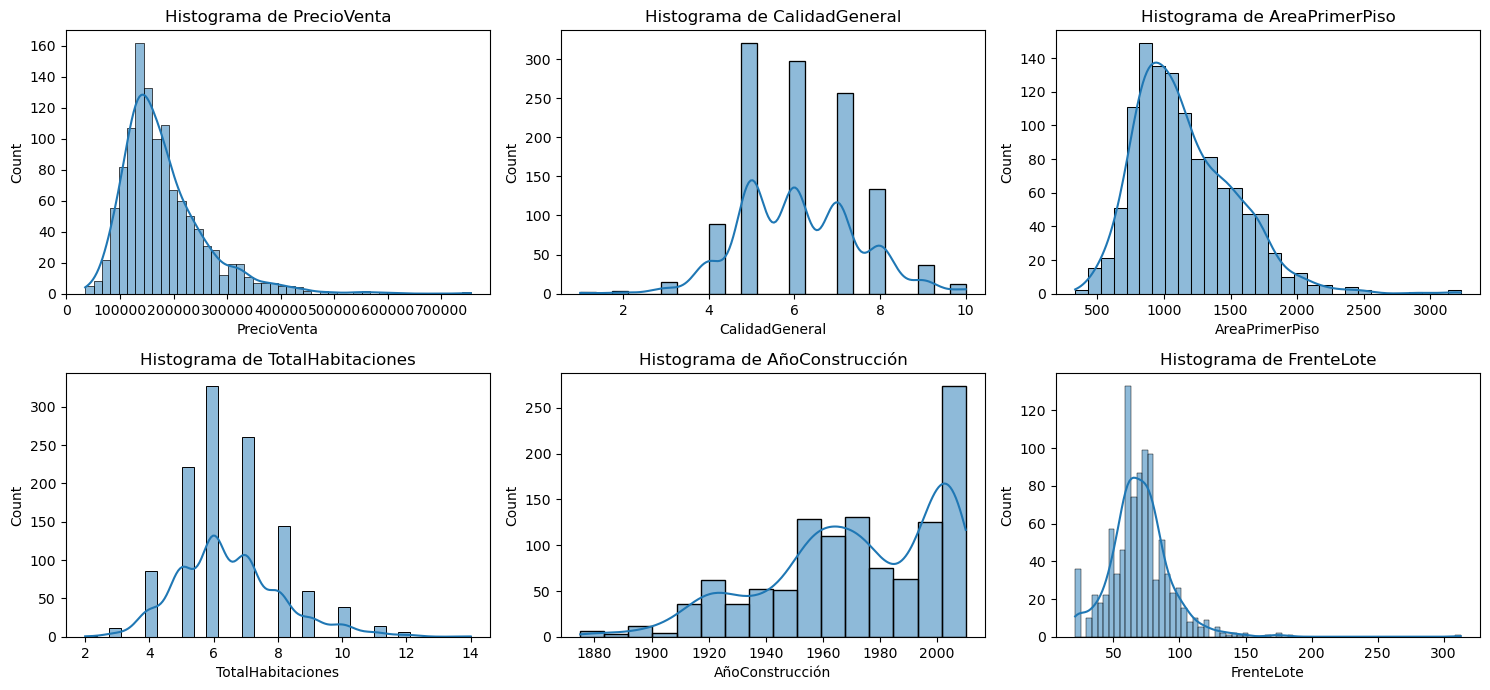

In [4]:
# Calcular estadísticas básicas para cada variable
print("Estadísticas básicas:")
print(datos_entrenamiento.describe())

# Verificar si hay valores nulos
print("Valores nulos por columna:")
print(datos_entrenamiento.isnull().sum())

# Graficar histogramas para cada variable
plt.figure(figsize=(15, 10))
for i, columna in enumerate(datos_entrenamiento.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(datos_entrenamiento[columna], kde=True)
    plt.title(f'Histograma de {columna}')
plt.tight_layout()
plt.show()

Paso 4: Selección de Variables y Correlación
Punto del proyecto: Seleccionar las dos variables con mayor correlación con PrecioVenta.

Correlaciones con PrecioVenta:
CalidadGeneral       0.793990
AreaPrimerPiso       0.616289
TotalHabitaciones    0.564707
AñoConstrucción      0.534171
FrenteLote           0.363292
dtype: float64
Las dos variables con mayor correlación son: Index(['CalidadGeneral', 'AreaPrimerPiso'], dtype='object')


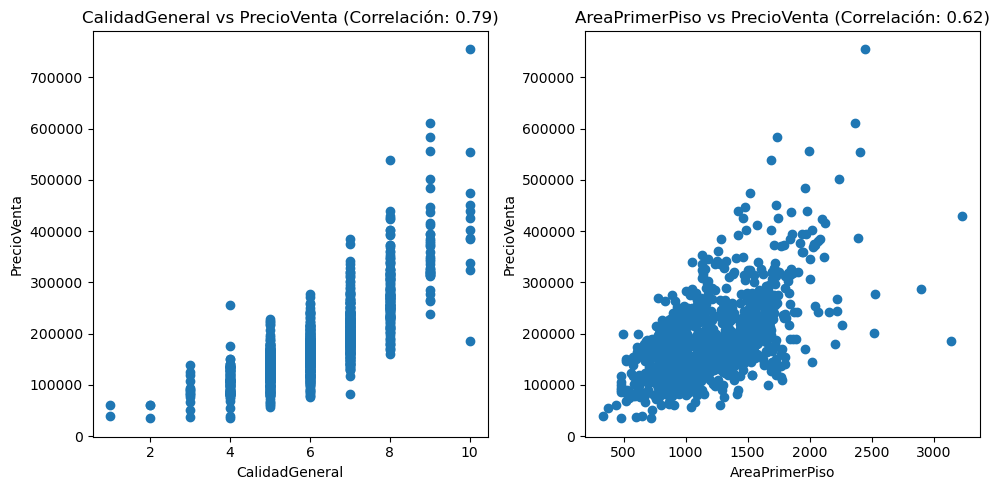

In [5]:
# Calcular la correlación entre cada variable independiente y la variable dependiente
correlaciones = datos_entrenamiento.corrwith(datos_entrenamiento['PrecioVenta'])

# Excluir la correlación de PrecioVenta consigo misma
correlaciones = correlaciones.drop('PrecioVenta')

print("Correlaciones con PrecioVenta:")
print(correlaciones)

# Seleccionar las dos variables con mayor correlación
top_2_variables = correlaciones.abs().nlargest(2).index
print("Las dos variables con mayor correlación son:", top_2_variables)

# Graficar scatterplots para las dos variables seleccionadas
plt.figure(figsize=(10, 5))
for i, variable in enumerate(top_2_variables):
    plt.subplot(1, 2, i+1)
    plt.scatter(datos_entrenamiento[variable], datos_entrenamiento['PrecioVenta'])
    plt.title(f'{variable} vs PrecioVenta (Correlación: {correlaciones[variable]:.2f})')
    plt.xlabel(variable)
    plt.ylabel('PrecioVenta')
plt.tight_layout()
plt.show()

CalidadGeneral vs PrecioVenta (Correlación: 0.79)

Patrón claro: A medida que la calidad general aumenta, el precio de venta también lo hace.
Correlación alta (0.79): Esto indica que CalidadGeneral es un fuerte predictor del PrecioVenta.
Distribución discreta: Como es una variable categórica (del 1 al 10), los valores en el eje X están agrupados en estos puntos.
Más variabilidad en precios altos: A medida que la calidad aumenta, hay más dispersión en los precios de venta.

Área del Primer Piso vs PrecioVenta (Correlación: 0.61)

Patrón positivo: A medida que el área del primer piso aumenta, el precio de venta también sube.
Correlación moderada-alta (0.61): Indica que hay una relación importante, aunque no tan fuerte como en la primera gráfica.
Mayor dispersión en áreas grandes: A partir de 2000 pies cuadrados, los precios son más variables, lo que sugiere que otros factores también influyen.

Paso 5: Creación del Modelo de Regresión Lineal Manual
Punto del proyecto: Crear una función para entrenar un modelo de regresión lineal manualmente.



In [6]:
def entrenar_regresion_lineal(x, y, epochs=1000, learning_rate=0.01, imprimir_error_cada=100):
    # Inicializar los parámetros del modelo
    beta = np.zeros(2)  # beta[0] es el intercepto, beta[1] es la pendiente
    
    # Crear una matriz de 2 columnas: una con x y otra con unos
    X = np.column_stack((x, np.ones(len(x))))
    
    # Lista para almacenar los errores
    errores = []
    
    # Diccionario para almacenar el historial de modelos
    historial_modelos = {}
    
    for epoch in range(epochs):
        # Calcular la predicción
        y_pred = np.dot(X, beta)
        
        # Calcular el error (MSE)
        error = np.mean((y - y_pred) ** 2)
        errores.append(error)
        
        # Calcular el gradiente
        gradiente = np.dot(X.T, (y_pred - y)) / len(y)
        
        # Actualizar los parámetros usando el learning rate
        beta -= learning_rate * gradiente
        
        # Almacenar el modelo en el historial
        historial_modelos[epoch + 1] = beta.copy()
        
        # Imprimir el error cada cierto número de iteraciones
        if (epoch + 1) % imprimir_error_cada == 0:
            print(f'Época {epoch + 1}, Error: {error}')
    
    return historial_modelos, errores

    Paso 6: Graficar la Curva de Aprendizaje
    Punto del proyecto: Crear una función que grafique cómo cambia el error en el tiempo.

In [8]:
def graficar_curva_aprendizaje(errores):
    plt.plot(errores)
    plt.title('Curva de Aprendizaje')
    plt.xlabel('Época')
    plt.ylabel('Error (MSE)')
    plt.show()

Paso 7: Graficar la Evolución del Modelo en el Tiempo
Punto del proyecto: Crear una función que grafique cómo evoluciona el modelo entrenado en el tiempo.

In [ ]:


def graficar_evolucion_modelo(historial_modelos, x, y, n=3, max_leyendas=5):
    # Crear una figura
    plt.figure(figsize=(10, 6))
    
    # Graficar los datos reales
    plt.scatter(x, y, label='Datos reales', color='blue')
    
    # Obtener las épocas y ordenarlas
    epocas = sorted(historial_modelos.keys())
    
    # Seleccionar un subconjunto de épocas para mostrar en la leyenda
    epocas_seleccionadas = set()
    epocas_seleccionadas.add(epocas[0])  # Primera época
    epocas_seleccionadas.add(epocas[-1])  # Última época
    
    # Añadir algunas épocas intermedias
    for i in range(1, max_leyendas - 1):
        idx = int(i * len(epocas) / (max_leyendas - 1))
        epocas_seleccionadas.add(epocas[idx])
    
    # Graficar el modelo cada n iteraciones
    for epoch, beta in historial_modelos.items():
        if epoch % n == 0:
            y_pred = beta[0] * x + beta[1]
            if epoch in epocas_seleccionadas:
                plt.plot(x, y_pred, label=f'Época {epoch}')
            else:
                plt.plot(x, y_pred, color='gray', alpha=0.5)
    
    plt.title('Evolución del Modelo')
    plt.xlabel('Variable Independiente (x)')
    plt.ylabel('Variable Dependiente (y)')
    plt.legend()
    plt.show()


Paso 8: Entrenar y Graficar para Ambas Variables
Punto del proyecto: Entrenar modelos uni-variable para ambas variables y graficar las curvas de aprendizaje y la evolución del modelo.

Época 10, Error: 2788908791.047682
Época 20, Error: 2780695183.5099664
Época 30, Error: 2776105402.568893
Época 40, Error: 2771559016.049406
Época 50, Error: 2767055488.3134313
Época 60, Error: 2762594415.326761
Época 70, Error: 2758175396.8685374
Época 80, Error: 2753798036.4907827
Época 90, Error: 2749461941.482835
Época 100, Error: 2745166722.836112
Época 110, Error: 2740911995.2092195
Época 120, Error: 2736697376.893372
Época 130, Error: 2732522489.7781525
Época 140, Error: 2728386959.3175926
Época 150, Error: 2724290414.4965677
Época 160, Error: 2720232487.7975116
Época 170, Error: 2716212815.1674447
Época 180, Error: 2712231035.985316
Época 190, Error: 2708286793.0296464
Época 200, Error: 2704379732.4464855
Época 210, Error: 2700509503.7176633
Época 220, Error: 2696675759.6293426
Época 230, Error: 2692878156.2408714
Época 240, Error: 2689116352.853927
Época 250, Error: 2685390011.9819455
Época 260, Error: 2681698799.3198533
Época 270, Error: 2678042383.7140656
Época 280, Error: 2

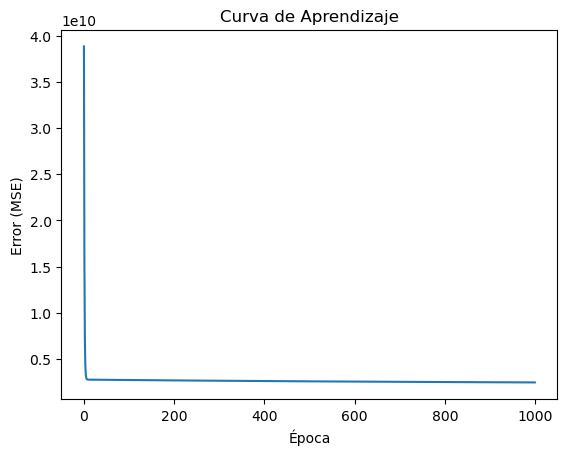

c:\Users\hsuna\anaconda3\envs\venr_ugal_test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


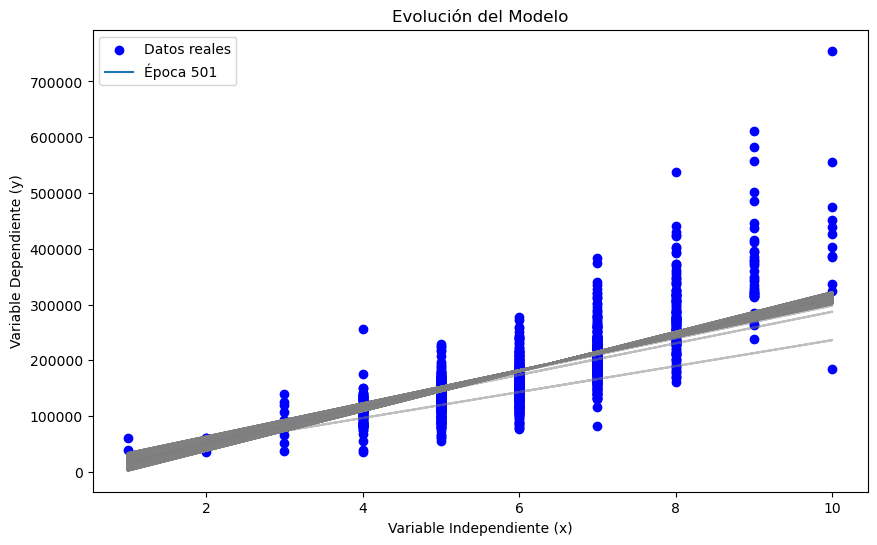

Época 10, Error: 38756554873.53086
Época 20, Error: 38686810584.95778
Época 30, Error: 38617205644.4984
Época 40, Error: 38547739773.737114
Época 50, Error: 38478412694.81463
Época 60, Error: 38409224130.42674
Época 70, Error: 38340173803.82337
Época 80, Error: 38271261438.80732
Época 90, Error: 38202486759.73326
Época 100, Error: 38133849491.506584
Época 110, Error: 38065349359.58234
Época 120, Error: 37996986089.96409
Época 130, Error: 37928759409.20284
Época 140, Error: 37860669044.39597
Época 150, Error: 37792714723.1861
Época 160, Error: 37724896173.759995
Época 170, Error: 37657213124.84751
Época 180, Error: 37589665305.72051
Época 190, Error: 37522252446.19178
Época 200, Error: 37454974276.61389
Época 210, Error: 37387830527.878204
Época 220, Error: 37320820931.41374
Época 230, Error: 37253945219.18613
Época 240, Error: 37187203123.696526
Época 250, Error: 37120594377.98053
Época 260, Error: 37054118715.60716
Época 270, Error: 36987775870.67775
Época 280, Error: 36921565577.8248

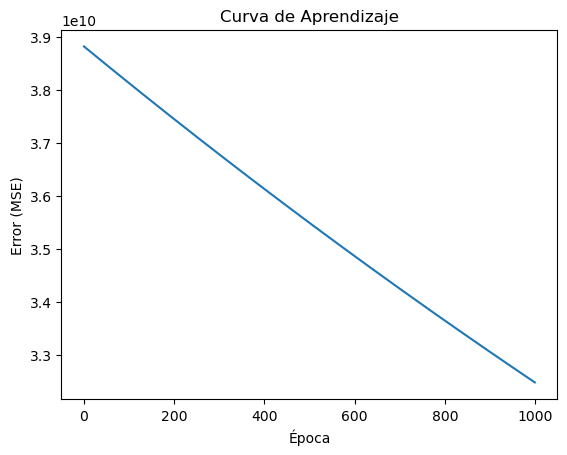

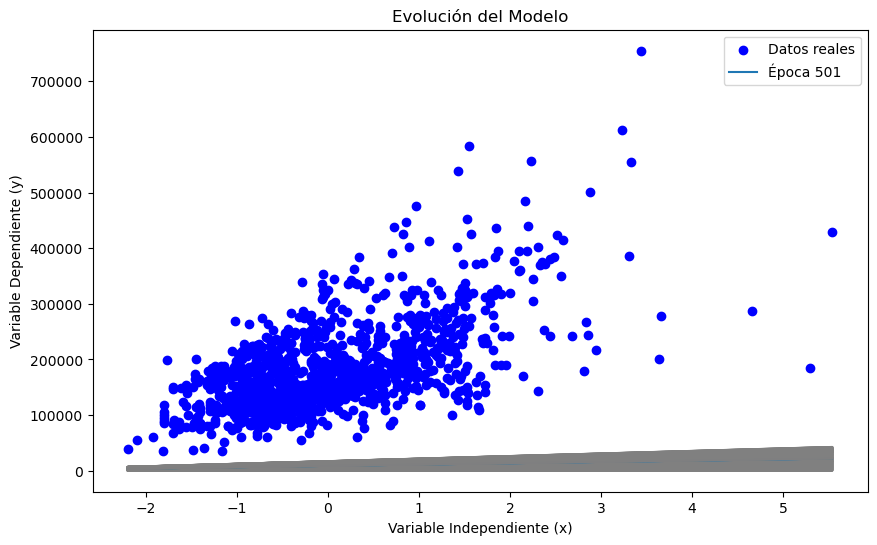

In [11]:

# Entrenar el modelo para CalidadGeneral
x_entrenamiento_calidad = datos_entrenamiento['CalidadGeneral']
y_entrenamiento = datos_entrenamiento['PrecioVenta']
historial_modelos_calidad, errores_calidad = entrenar_regresion_lineal(x_entrenamiento_calidad, y_entrenamiento, learning_rate=0.01, imprimir_error_cada=10)

# Graficar la curva de aprendizaje para CalidadGeneral
graficar_curva_aprendizaje(errores_calidad)

# Graficar la evolución del modelo para CalidadGeneral
graficar_evolucion_modelo(historial_modelos_calidad, x_entrenamiento_calidad, y_entrenamiento, n=3)

# Entrenar el modelo para AreaPrimerPiso (con learning rate más pequeño)
x_entrenamiento_area = (datos_entrenamiento['AreaPrimerPiso'] - datos_entrenamiento['AreaPrimerPiso'].mean()) / datos_entrenamiento['AreaPrimerPiso'].std()
historial_modelos_area, errores_area = entrenar_regresion_lineal(x_entrenamiento_area, y_entrenamiento, learning_rate=0.0001, imprimir_error_cada=10)

# Graficar la curva de aprendizaje para AreaPrimerPiso
graficar_curva_aprendizaje(errores_area)

# Graficar la evolución del modelo para AreaPrimerPiso
graficar_evolucion_modelo(historial_modelos_area, x_entrenamiento_area, y_entrenamiento, n=3)

Paso 9: Comparación con scikit-learn
Punto del proyecto: Comparar el modelo manual con el modelo de scikit-lear

Error con scikit-learn (CalidadGeneral): 2630182608.9486394


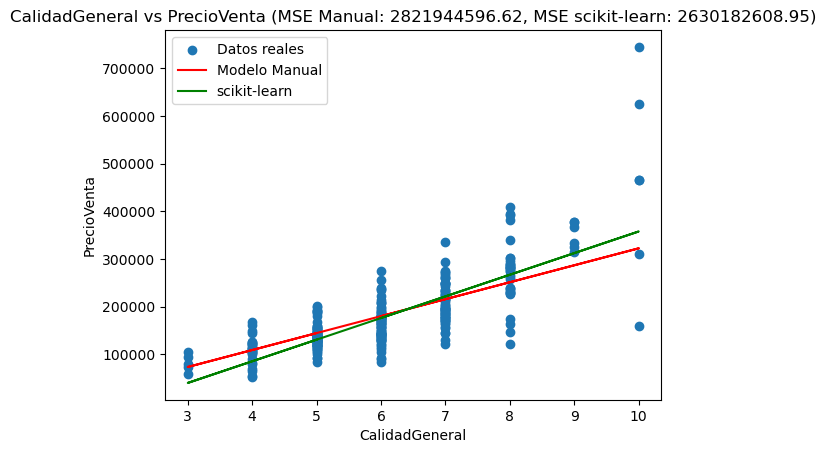

Error con scikit-learn (AreaPrimerPiso): 4498792650.507931


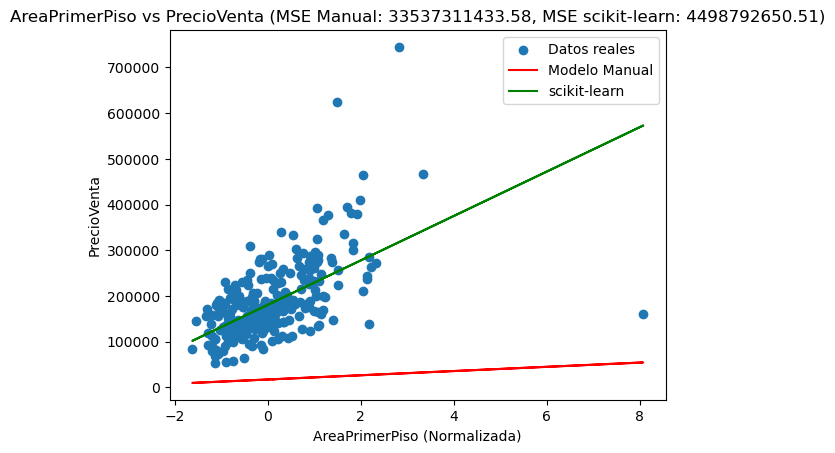

In [74]:
# Entrenar el modelo con scikit-learn para CalidadGeneral
modelo_sklearn_calidad = LinearRegression()
modelo_sklearn_calidad.fit(x_entrenamiento_calidad.values.reshape(-1, 1), y_entrenamiento)

# Predecir con scikit-learn para CalidadGeneral
y_pred_sklearn_calidad = modelo_sklearn_calidad.predict(x_validacion_calidad.values.reshape(-1, 1))

# Calcular el error con scikit-learn para CalidadGeneral
mse_sklearn_calidad = np.mean((y_validacion - y_pred_sklearn_calidad) ** 2)
print(f'Error con scikit-learn (CalidadGeneral): {mse_sklearn_calidad}')

# Graficar los resultados de ambos modelos para CalidadGeneral
plt.scatter(x_validacion_calidad, y_validacion, label='Datos reales')
plt.plot(x_validacion_calidad, y_pred_calidad, color='red', label='Modelo Manual')
plt.plot(x_validacion_calidad, y_pred_sklearn_calidad, color='green', label='scikit-learn')
plt.title(f'CalidadGeneral vs PrecioVenta (MSE Manual: {mse_calidad:.2f}, MSE scikit-learn: {mse_sklearn_calidad:.2f})')
plt.xlabel('CalidadGeneral')
plt.ylabel('PrecioVenta')
plt.legend()
plt.show()

# Entrenar el modelo con scikit-learn para AreaPrimerPiso
modelo_sklearn_area = LinearRegression()
modelo_sklearn_area.fit(x_entrenamiento_area.values.reshape(-1, 1), y_entrenamiento)

# Predecir con scikit-learn para AreaPrimerPiso
y_pred_sklearn_area = modelo_sklearn_area.predict(x_validacion_area.values.reshape(-1, 1))

# Calcular el error con scikit-learn para AreaPrimerPiso
mse_sklearn_area = np.mean((y_validacion - y_pred_sklearn_area) ** 2)
print(f'Error con scikit-learn (AreaPrimerPiso): {mse_sklearn_area}')

# Graficar los resultados de ambos modelos para AreaPrimerPiso
plt.scatter(x_validacion_area, y_validacion, label='Datos reales')
plt.plot(x_validacion_area, y_pred_area, color='red', label='Modelo Manual')
plt.plot(x_validacion_area, y_pred_sklearn_area, color='green', label='scikit-learn')
plt.title(f'AreaPrimerPiso vs PrecioVenta (MSE Manual: {mse_area:.2f}, MSE scikit-learn: {mse_sklearn_area:.2f})')
plt.xlabel('AreaPrimerPiso (Normalizada)')
plt.ylabel('PrecioVenta')
plt.legend()
plt.show()

Paso 10: Implementación Orientada a Objetos
Punto del proyecto: Implementar todo el desarrollo usando programación orientada a objetos.



Época 100, Error: 2745166722.836112
Época 200, Error: 2704379732.4464855
Época 300, Error: 2667278654.3491783
Época 400, Error: 2633530393.37593
Época 500, Error: 2602831956.1032624
Época 600, Error: 2574907730.563734
Época 700, Error: 2549507011.789142
Época 800, Error: 2526401750.9699106
Época 900, Error: 2505384508.022487
Época 1000, Error: 2486266589.1828375


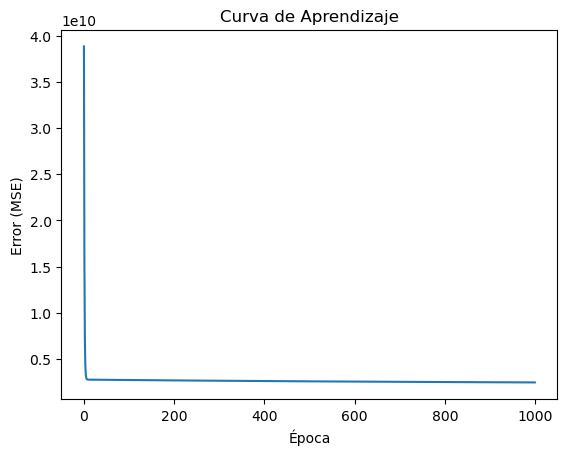

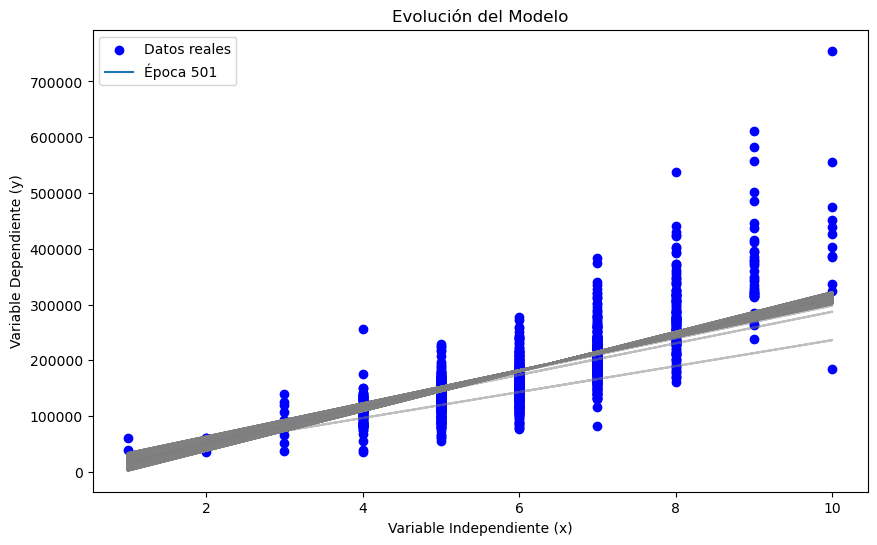

Época 100, Error: 38133849491.506584
Época 200, Error: 37454974276.61389
Época 300, Error: 36789541589.52907
Época 400, Error: 36137285252.377205
Época 500, Error: 35497944357.91892
Época 600, Error: 34871263165.18551
Época 700, Error: 34256990997.180725
Época 800, Error: 33654882140.608143
Época 900, Error: 33064695747.58409
Época 1000, Error: 32486195739.29667


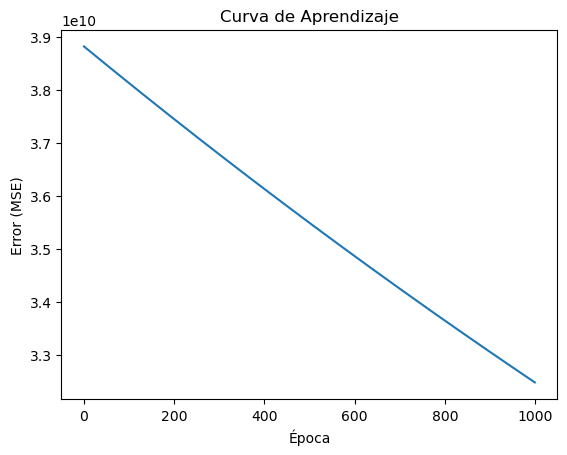

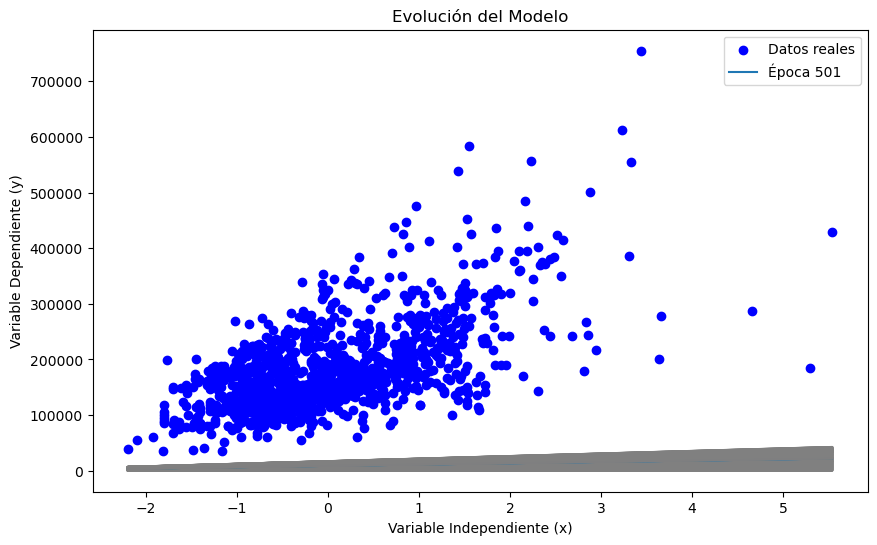

In [15]:
import numpy as np
import matplotlib.pyplot as plt

class RegresionLineal:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.beta = np.zeros(2)
        self.errores = []
        self.historial_modelos = {}
    
    def entrenar(self, epochs=1000, learning_rate=0.01, imprimir_error_cada=100):
        X = np.column_stack((self.x, np.ones(len(self.x))))
        
        for epoch in range(epochs):
            y_pred = np.dot(X, self.beta)
            error = np.mean((self.y - y_pred) ** 2)
            self.errores.append(error)
            
            gradiente = np.dot(X.T, (y_pred - self.y)) / len(self.y)
            self.beta -= learning_rate * gradiente
            
            self.historial_modelos[epoch + 1] = self.beta.copy()
            
            if (epoch + 1) % imprimir_error_cada == 0:
                print(f'Época {epoch + 1}, Error: {error}')
    
    def predecir(self, x):
        X = np.column_stack((x, np.ones(len(x))))
        return np.dot(X, self.beta)
    
    def graficar_curva_aprendizaje(self):
        plt.plot(self.errores)
        plt.title('Curva de Aprendizaje')
        plt.xlabel('Época')
        plt.ylabel('Error (MSE)')
        plt.show()
    
    def graficar_evolucion_modelo(self, n=3, max_leyendas=5):
        plt.figure(figsize=(10, 6))
        plt.scatter(self.x, self.y, label='Datos reales', color='blue')
        
        # Obtener las épocas y ordenarlas
        epocas = sorted(self.historial_modelos.keys())
        
        # Seleccionar un subconjunto de épocas para mostrar en la leyenda
        epocas_seleccionadas = set()
        epocas_seleccionadas.add(epocas[0])  # Primera época
        epocas_seleccionadas.add(epocas[-1])  # Última época
        
        # Añadir algunas épocas intermedias
        for i in range(1, max_leyendas - 1):
            idx = int(i * len(epocas) / (max_leyendas - 1))
            epocas_seleccionadas.add(epocas[idx])
        
        # Graficar el modelo cada n iteraciones
        for epoch, beta in self.historial_modelos.items():
            if epoch % n == 0:
                y_pred = beta[0] * self.x + beta[1]
                if epoch in epocas_seleccionadas:
                    plt.plot(self.x, y_pred, label=f'Época {epoch}')
                else:
                    plt.plot(self.x, y_pred, color='gray', alpha=0.5)
        
        plt.title('Evolución del Modelo')
        plt.xlabel('Variable Independiente (x)')
        plt.ylabel('Variable Dependiente (y)')
        plt.legend()
        plt.show()

# Uso de la clase para CalidadGeneral
modelo_calidad = RegresionLineal(datos_entrenamiento['CalidadGeneral'], datos_entrenamiento['PrecioVenta'])
modelo_calidad.entrenar()
modelo_calidad.graficar_curva_aprendizaje()
modelo_calidad.graficar_evolucion_modelo()

# Uso de la clase para AreaPrimerPiso
x_entrenamiento_area = (datos_entrenamiento['AreaPrimerPiso'] - datos_entrenamiento['AreaPrimerPiso'].mean()) / datos_entrenamiento['AreaPrimerPiso'].std()
modelo_area = RegresionLineal(x_entrenamiento_area, datos_entrenamiento['PrecioVenta'])
modelo_area.entrenar(learning_rate=0.0001)
modelo_area.graficar_curva_aprendizaje()
modelo_area.graficar_evolucion_modelo()